In [1]:
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as pyspark_functions
from pyspark import SparkContext, SparkConf
from pandas import isnull
from numpy import count_nonzero
from pyspark.sql.functions import col, count, isnan, when, coalesce, lag, lead, sum
from pyspark.sql.window import Window

import warnings
warnings.filterwarnings("ignore")

In [2]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [3]:
# Load the dataset
data_frame1 = spark.read.csv("Dataset/col_mat_nuw_output.csv", header=True, inferSchema=True)

In [4]:
data_frame1.printSchema()

root
 |-- 0.00019698343957810148: double (nullable = true)
 |-- Colombo Proper: string (nullable = true)
 |-- 2019-01-01: date (nullable = true)
 |-- 2019-01-02: date (nullable = true)



In [5]:
data_frame1.show()

+----------------------+--------------+----------+----------+
|0.00019698343957810148|Colombo Proper|2019-01-01|2019-01-02|
+----------------------+--------------+----------+----------+
|  2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|  9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|  2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|  1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
|  1.082296700235670...|Colombo Proper|2019-01-06|2019-01-07|
|  3.926829280477309...|Colombo Proper|2019-01-07|2019-01-08|
|  9.153156350685351E-5|Colombo Proper|2019-01-08|2019-01-09|
|  1.205978992853015...|Colombo Proper|2019-01-09|2019-01-10|
|  1.297723562983258...|Colombo Proper|2019-01-10|2019-01-11|
|  2.239188166801278...|Colombo Proper|2019-01-11|2019-01-12|
|  1.569418094178759...|Colombo Proper|2019-01-12|2019-01-13|
|                  NULL|Colombo Proper|2019-01-13|2019-01-14|
|  1.336291906862603...|Colombo Proper|2019-01-14|2019-01-15|
|  6.374

In [6]:
column_name = ['HCHO reading', 'Location', 'Current Date', 'Next Date']

# Rename columns using withColumnRenamed()
for i, new_name in enumerate(column_name):
    data_frame1 = data_frame1.withColumnRenamed(data_frame1.columns[i], new_name)

# Display the DataFrame
data_frame1.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|  2019-01-14|2019-01-15|
|6.37441

In [7]:
data_frame2 = spark.read.csv("Dataset/kan_output.csv", header=True, inferSchema=True)
data_frame2.printSchema()

root
 |-- 0.00017607134598773356: double (nullable = true)
 |-- Kandy Proper: string (nullable = true)
 |-- 2019-01-01: date (nullable = true)
 |-- 2019-01-02: date (nullable = true)



In [8]:
data_frame2.show()

+----------------------+------------+----------+----------+
|0.00017607134598773356|Kandy Proper|2019-01-01|2019-01-02|
+----------------------+------------+----------+----------+
|  9.220391253917748E-5|Kandy Proper|2019-01-02|2019-01-03|
|                  NULL|Kandy Proper|2019-01-03|2019-01-04|
|  1.908681983853839...|Kandy Proper|2019-01-04|2019-01-05|
|  1.219517840206744...|Kandy Proper|2019-01-05|2019-01-06|
|  -6.51408612938880...|Kandy Proper|2019-01-06|2019-01-07|
|    1.6323820639265E-4|Kandy Proper|2019-01-07|2019-01-08|
|  -6.73520553391426...|Kandy Proper|2019-01-08|2019-01-09|
|  1.279693658243135...|Kandy Proper|2019-01-09|2019-01-10|
|  4.546048424126012E-5|Kandy Proper|2019-01-10|2019-01-11|
|  3.600074175192105E-5|Kandy Proper|2019-01-11|2019-01-12|
|  1.286629698010177E-4|Kandy Proper|2019-01-12|2019-01-13|
|                  NULL|Kandy Proper|2019-01-13|2019-01-14|
|                  NULL|Kandy Proper|2019-01-14|2019-01-15|
|   9.63639634671553E-5|Kandy Proper|201

In [9]:
column_name = ['HCHO reading', 'Location', 'Current Date', 'Next Date']

# Rename columns using withColumnRenamed()
for i, new_name in enumerate(column_name):
    data_frame2 = data_frame2.withColumnRenamed(data_frame2.columns[i], new_name)

# Display the DataFrame
data_frame2.show()

+--------------------+------------+------------+----------+
|        HCHO reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|                NULL|Kandy Proper|  2019-01-13|2019-01-14|
|                NULL|Kandy Proper|  2019-01-14|2019-01-15|
| 9.63639634671553E-5|Kandy Proper|  201

In [10]:
data_frame3 = spark.read.csv("Dataset/mon_kur_jaf_output.csv", header=True, inferSchema=True)
data_frame3.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- Bibile, Monaragala: string (nullable = true)
 |-- 2019-01-01: date (nullable = true)
 |-- 2019-01-02: date (nullable = true)



In [11]:
data_frame3.show()

+--------------------+------------------+----------+----------+
|                 _c0|Bibile, Monaragala|2019-01-01|2019-01-02|
+--------------------+------------------+----------+----------+
|1.919914652467399E-5|Bibile, Monaragala|2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|2019-01-12|2019-01-13|
|                NULL|Bibile, Monaragala|2019-01-13|2019-01-14|
|                NULL|Bibile, Monaragala

In [12]:
column_name = ['HCHO reading', 'Location', 'Current Date', 'Next Date']

# Rename columns using withColumnRenamed()
for i, new_name in enumerate(column_name):
    data_frame3 = data_frame3.withColumnRenamed(data_frame3.columns[i], new_name)

# Display the DataFrame
data_frame3.show()

+--------------------+------------------+------------+----------+
|        HCHO reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|                NULL|Bibile, Monaragala|  2019-01-13|2019-01-14|
|         

In [15]:
# Concatenate DataFrames vertically
concat_df = data_frame1.union(data_frame2).union(data_frame3)
concat_df.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|  2019-01-14|2019-01-15|
|6.37441

In [19]:
import pandas as pd
# Covert pyspark dataframe to pandas dataframe 
pandas_data_frame = concat_df.toPandas()
# Path that i want to save 
save_path = "Dataset/Concat_pandas.csv"
# Save the pandas df to csv
pandas_data_frame.to_csv(save_path, index=False)

# Null Values 

In [20]:
# Check for null values in each column
concat_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in concat_df.columns)).show()

+------------+--------+------------+---------+
|HCHO reading|Location|Current Date|Next Date|
+------------+--------+------------+---------+
|        4863|       0|           0|        0|
+------------+--------+------------+---------+



In [22]:
null_hcho = concat_df.filter(col("HCHO reading").isNull()).count()

# continue until there are no nulls left
while null_hcho > 0:
    # window specs
    backward_windowSpec = Window.orderBy("Current Date")
    forward_windowSpec = Window.orderBy("Current Date")
    
    #using lag to carry last observation forward
    previous_value = lag("HCHO reading", 1).over(backward_windowSpec)
    concat_df = concat_df.withColumn("HCHO reading", coalesce("HCHO reading", previous_value))
    
    # using lead to carry next observation backward
    next_value = lead("HCHO reading", 1).over(forward_windowSpec)
    concat_df = concat_df.withColumn("HCHO reading", coalesce("HCHO reading", next_value))
    
    #updating null counts
    null_hcho = concat_df.filter(col("HCHO reading").isNull()).count()

In [23]:
# Check for null values in each column
concat_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in concat_df.columns)).show()

+------------+--------+------------+---------+
|HCHO reading|Location|Current Date|Next Date|
+------------+--------+------------+---------+
|           0|       0|           0|        0|
+------------+--------+------------+---------+



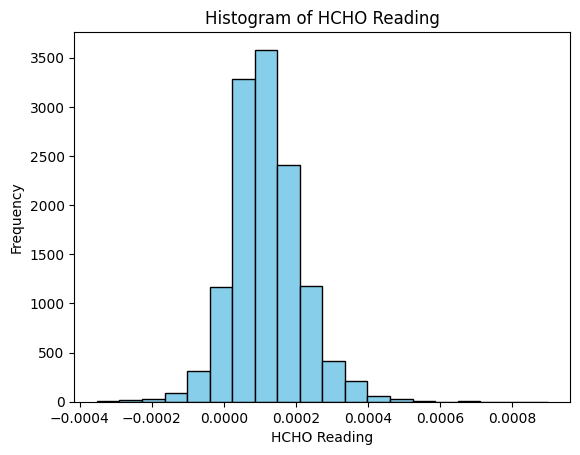

In [28]:
import matplotlib.pyplot as plt

pandas_data_frame = concat_df.toPandas()

# Plot the histogram
plt.hist(pandas_data_frame['HCHO reading'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')

# Show the plot
plt.show()

# Outliers